In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=-10)
m.Equations([x**2-y**2+2*y<=1,x**2+y**2+2*x*y-2*x-2*y<=0,x**2<=4])
m.Minimize(x-2*y+2)
#m.Minimize(5*x1+5*x2)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x = ',xopt)
print('y = ',yopt)
print('z = ',xopt-2*yopt+2)
#print('z = ',5*x1opt+5*x2opt)

x =  -2.0000000025
y =  4.0000000075
z =  -8.0000000175


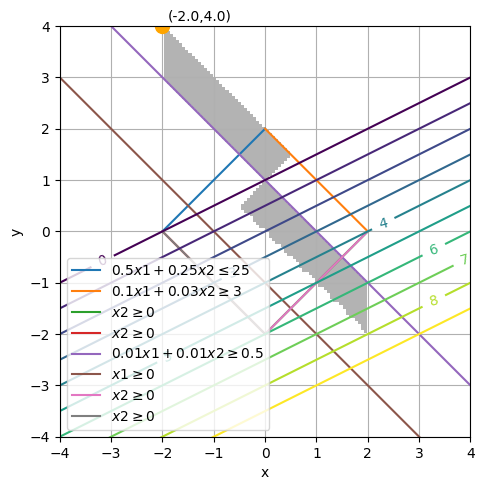

In [8]:
# visualize solution
g = np.linspace(-6,6,200)
x,y = np.meshgrid(g,g)
obj = x-2*y+2
#obj = 5*x+5*y
plt.imshow(((x**2-y**2+2*y<=1)&(x**2+y**2+2*x*y-2*x-2*y<=0)&(x**2<=4)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(-6, 6, 400)
x1 = np.linspace(-2, 0, 200)
x2 = np.linspace(0, 2, 200)
y0 = 2+x1   # 6*x+4*y<=24
y1 = 2-x2   # x+2*y<=6
y2 = 1-x0
y3 = -1 -x0
y4 = -2+x2
y5 = -2-x1

plt.plot(x1, y0, label=r'$0.5x1+0.25x2\leq25$')
plt.plot(x2, y1, label=r'$0.1x1+0.03x2\geq3$')
plt.plot(x2, y4, label=r'$x2\geq0$')
plt.plot(x1, y5, label=r'$x2\geq0$')
plt.plot(x0, y2, label=r'$0.01x1+0.01x2\geq0.5$')
plt.plot(x0, y3, label=r'$x1\geq0$')
plt.plot(x2, y4, label=r'$x2\geq0$')
plt.plot(x1, y5, label=r'$x2\geq0$')
xv = [round(xopt,2)]; yv = [round(yopt,2)]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(0,10,1))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)
plt.xlim(-4,4); plt.ylim(-4,4); plt.grid(); plt.tight_layout()
plt.legend(loc=3); plt.xlabel('x'); plt.ylabel('y')
plt.savefig('plot.png',dpi=300)
plt.show()